In [53]:
# Importing & Inspecting Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("trainkaggle.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
# Checking for missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64

In [93]:
# Handling Missing Values for Age

df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median()))

In [95]:
# Handling Missing Values for Cabin

df['Deck'] = df['Cabin'].str[0]
df.drop(columns=['Cabin'], inplace=True)

In [97]:
# Handling Missing Values for Embarked

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64

In [43]:
df['HasCabin'] = df['Deck'].notna().astype(int)

In [45]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
HasCabin       0
dtype: int64

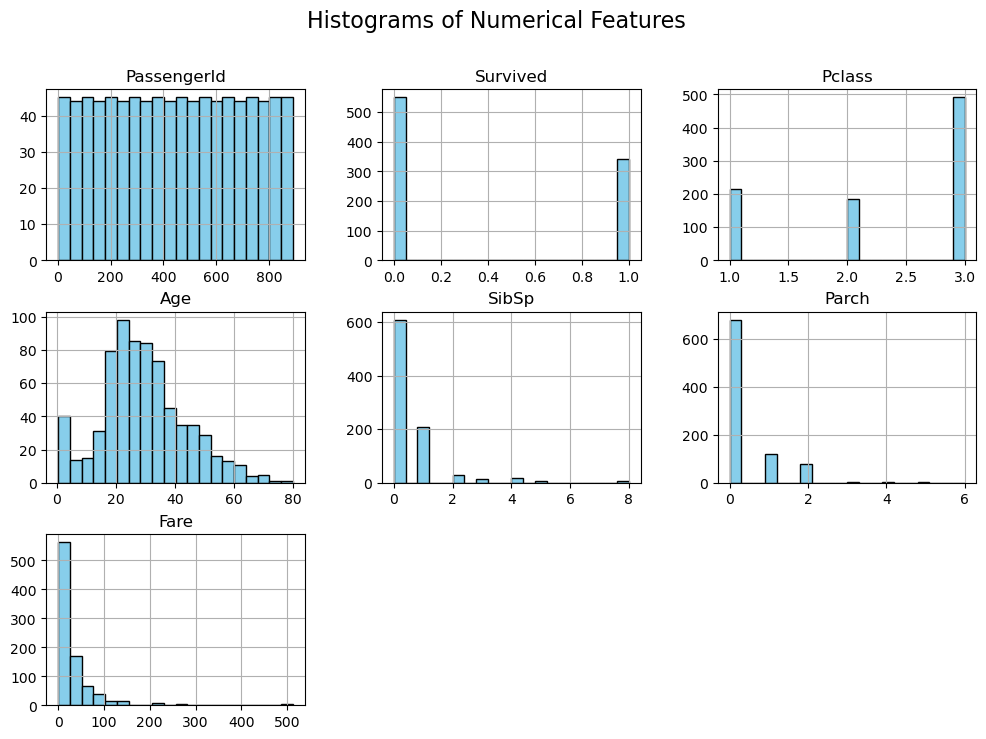

In [55]:
# Histograms of Numerical Features

df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

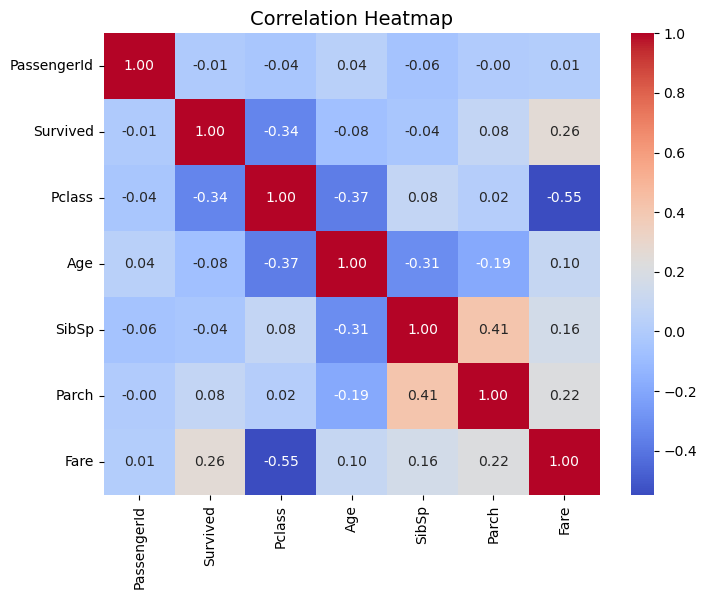

In [57]:
# Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

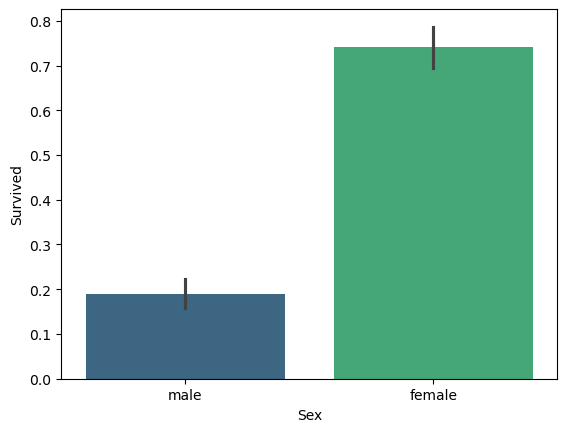

In [63]:
# Survival Rate by Gender

sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, palette="viridis", legend=False)

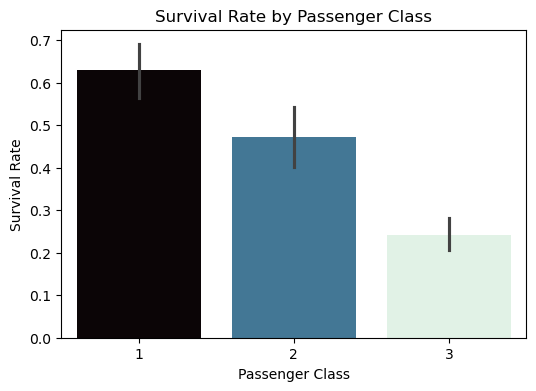

In [77]:
# Survival Rate by Passenger Class

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, palette="mako", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

<Axes: xlabel='AgeGroup', ylabel='Survived'>

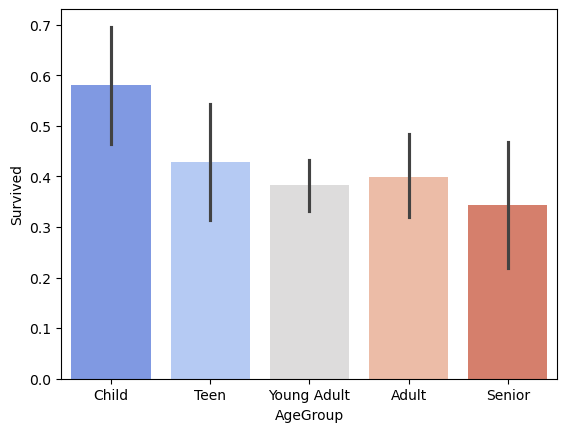

In [73]:
# Survival Rate by Age Groups

sns.barplot(x="AgeGroup", y="Survived", hue="AgeGroup", 
            data=df, palette="coolwarm", legend=False)

<Axes: xlabel='Embarked', ylabel='Survived'>

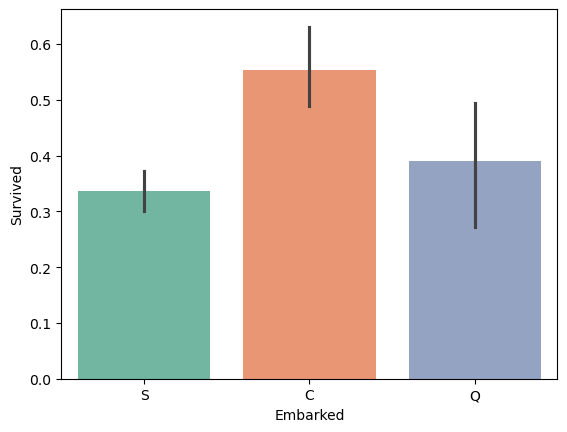

In [79]:
# Survival by Embarkation Port

sns.barplot(x="Embarked", y="Survived", hue="Embarked", data=df, palette="Set2", legend=False)

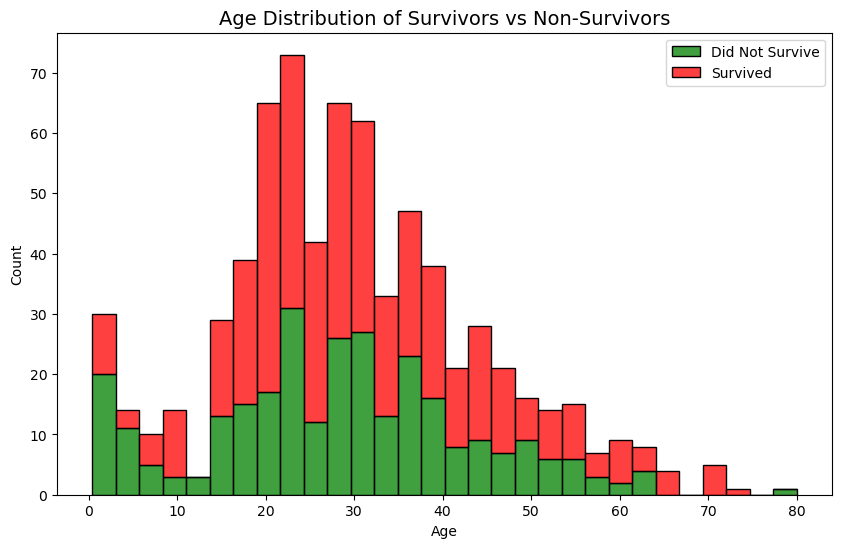

In [83]:
# Age Distribution of Survivors vs Non-Survivors

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30, palette={0:"red", 1:"green"})
plt.title("Age Distribution of Survivors vs Non-Survivors", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(labels=["Did Not Survive", "Survived"])
plt.show()

# Interpretation:

More young passengers survived compared to older ones.

Very young children had higher survival chances.

Many older passengers did not survive.

# Patterns Found

From our analysis:

Gender Bias in Survival – Women had a much higher survival rate than men.

Class Advantage – First-class passengers had a higher chance of survival.

Age Factor – Younger passengers survived more often than older ones.

Embarkation Port – Passengers embarking from Cherbourg had slightly higher survival rates.

# Conclusion

The analysis of the Titanic dataset revealed strong survival biases toward women, younger passengers, and those in higher passenger classes.

This aligns with the historical "women and children first" evacuation policy of the time.

We addressed missing values in Age, Cabin, and Embarked to ensure cleaner, more reliable results.

Overall, survival probability was influenced heavily by socio-economic status, age, and gender.